## Librerias

In [1]:
import sys
sys.path.append('../')
import funciones as fun
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
from empiricaldist import Cdf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from hyperopt import hp, fmin, tpe, Trials

In [2]:
from importlib import reload
import funciones  

# Recargar el módulo
reload(funciones)

<module 'funciones' from 'c:\\Users\\maria\\Desktop\\Business data\\2º Curso\\Casos practicos\\Reto 8\\R8_Naranja\\funciones.py'>

## Lectura datos

In [3]:
comp_a = pd.read_csv('Datos/Originales/Comp_A.csv')

In [4]:
comp_a.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida
0,0.775748,16.9,0.0,71.466562
1,0.776315,16.6,0.0,71.442768
2,0.776784,16.6,0.0,71.347653
3,0.777093,16.4,0.0,71.244807
4,0.777436,16.4,0.0,71.194101


## Estandarizar el df

In [5]:
x = comp_a.iloc[:,:-1]
y = comp_a.iloc[:, -1]

In [6]:
# Estandarizar el dataset
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns)

In [8]:
# Guardo el scaler
with open('Modelos/Comp_a/scaler_model.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Train Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 44)

# Análisis de las variables

In [10]:
y.describe()

count    39321.000000
mean        90.796443
std         15.561384
min         69.618537
25%         78.677732
50%         82.456064
75%        103.964637
max        125.416806
Name: Potencia_Medida, dtype: float64

In [11]:
x.describe()

,Presion,Temperatura,Frecuencia
count,39321.000000,39321.000000,39321.000000
mean,0.770542,11.936001,18.072116
std,0.021078,6.053740,24.295732
min,0.735058,-2.200000,0.000000
25%,0.749447,7.900000,0.000000
50%,0.766375,11.600000,0.000000
75%,0.792374,15.400000,32.641157
max,0.817415,36.300000,100.000000


In [12]:
fun.graficar_correlaciones(X, y)

# Gráfico de distribución

c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



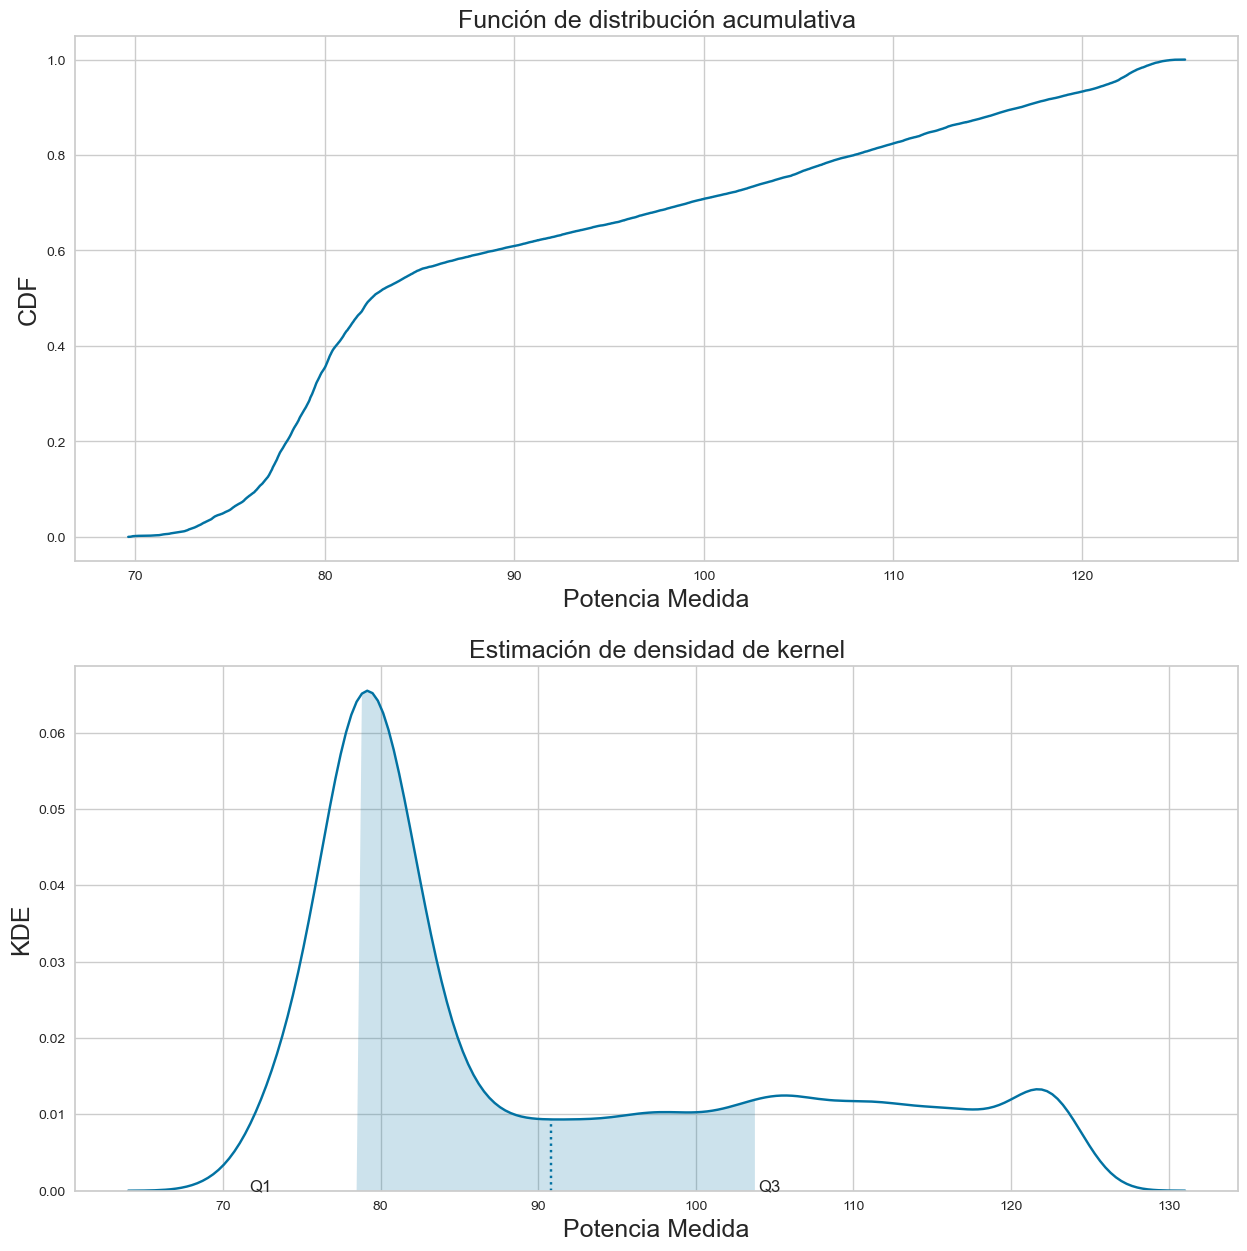

In [13]:
fun.grafico_distribucion(y)

## Modelos Base

In [14]:
compresor = 'a'

In [17]:
modelos = [
    ('LinearRegression', LinearRegression()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('ElasticNet', ElasticNet()),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42, n_jobs=-1)),
    ('SVR', SVR(kernel='linear')),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=44)),
    ('TweedieRegressor', TweedieRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=44))
]

LinearRegression - TRAIN = R^2: 0.950568637236097, RMSE: 3.459784099461075
 TEST = R^2: 0.9487462268144575, RMSE: 3.5218946348097138


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



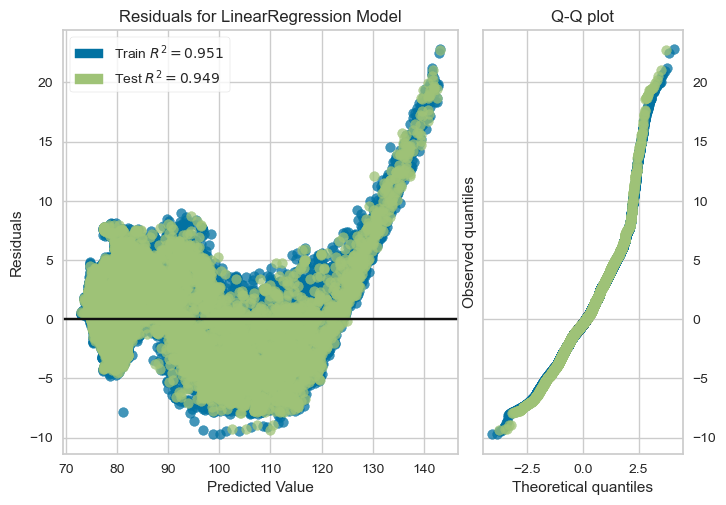

Lasso - TRAIN = R^2: 0.8623280532791042, RMSE: 5.774010663437071
 TEST = R^2: 0.8578803876435326, RMSE: 5.864627665202271


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but Lasso was fitted with feature names



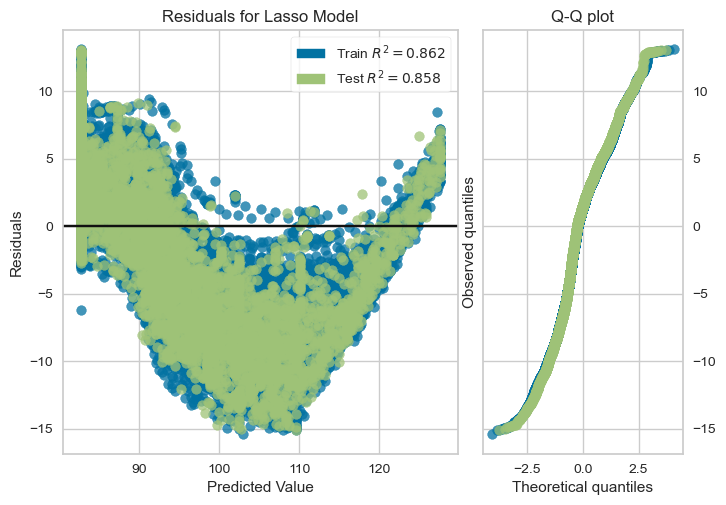

Ridge - TRAIN = R^2: 0.950568146866488, RMSE: 3.4598009826633147
 TEST = R^2: 0.9487421605385497, RMSE: 3.5220343387805775


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but Ridge was fitted with feature names



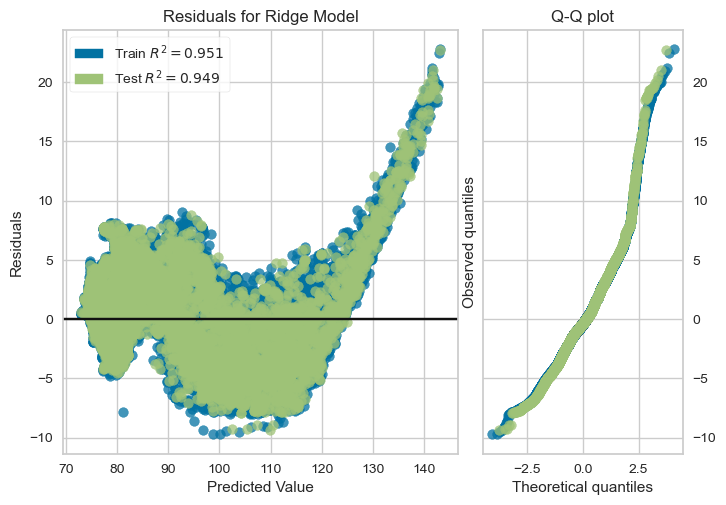

ElasticNet - TRAIN = R^2: 0.22520353827549836, RMSE: 13.697621523248728
 TEST = R^2: 0.22493043533786305, RMSE: 13.695685650297563


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but ElasticNet was fitted with feature names



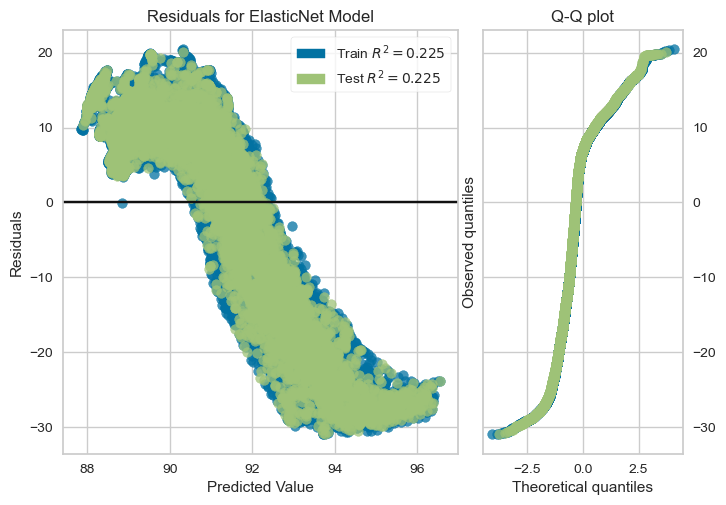

RandomForestRegressor - TRAIN = R^2: 0.9869083109855119, RMSE: 1.78051630880959
 TEST = R^2: 0.9874208817071435, RMSE: 1.744771417984529


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



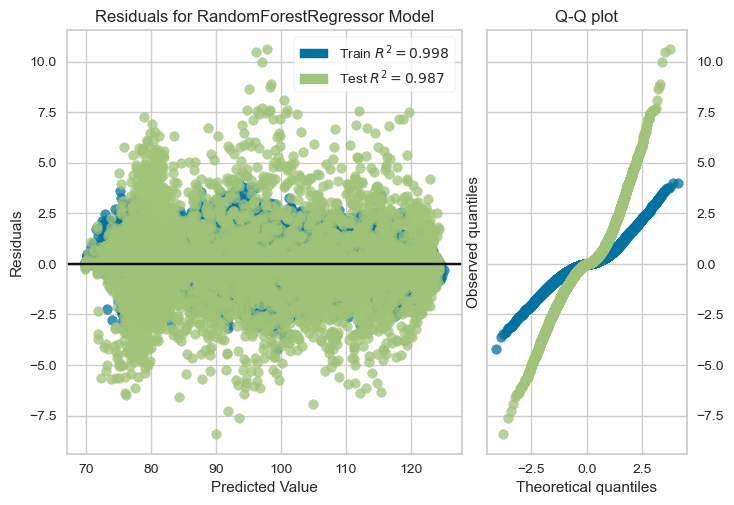

SVR - TRAIN = R^2: 0.9455392629109216, RMSE: 3.631549118932316
 TEST = R^2: 0.9441637467677456, RMSE: 3.675966727134745


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



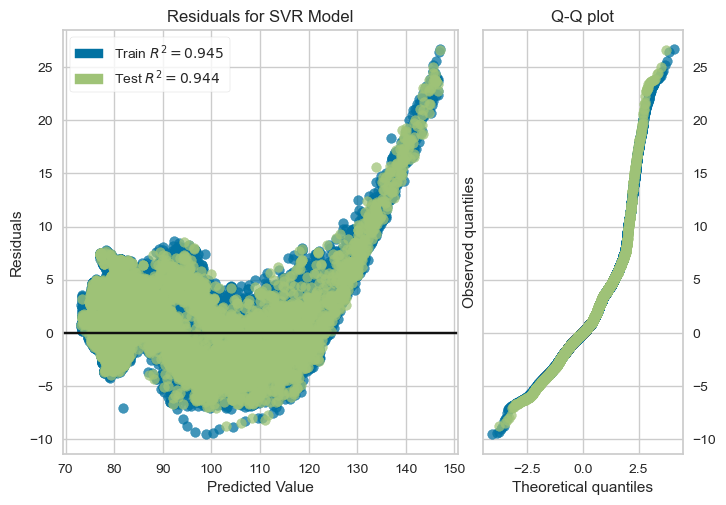

KNeighborsRegressor - TRAIN = R^2: 0.9861379623551135, RMSE: 1.8321578864932562
 TEST = R^2: 0.9869342557698417, RMSE: 1.7781996228600547


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



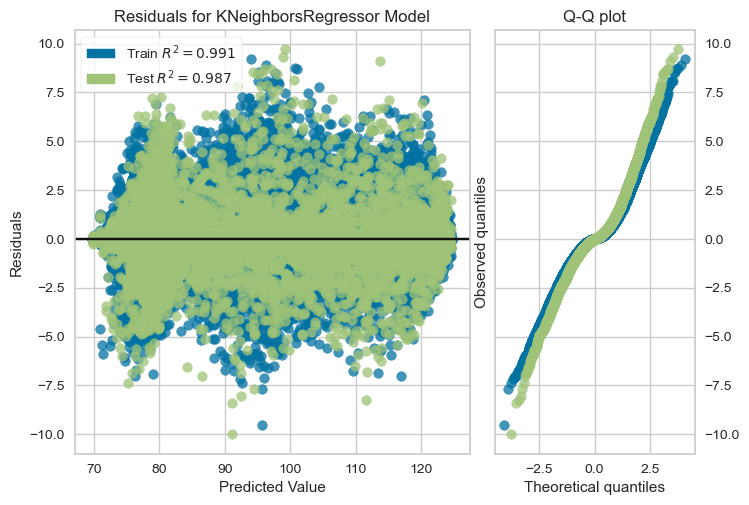

DecisionTreeRegressor - TRAIN = R^2: 0.9770549549590772, RMSE: 2.3571631013788235
 TEST = R^2: 0.9783723729972894, RMSE: 2.2877990383664137


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



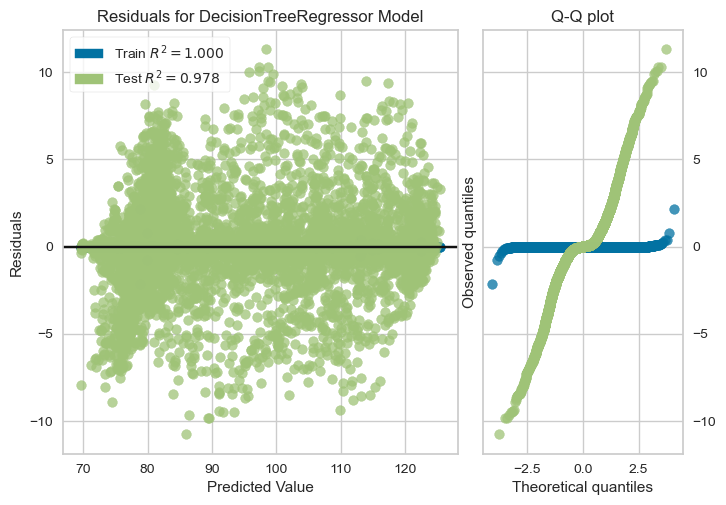

TweedieRegressor - TRAIN = R^2: 0.1486357678990952, RMSE: 14.358501297558801
 TEST = R^2: 0.14851715094240847, RMSE: 14.354940275728431


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but TweedieRegressor was fitted with feature names



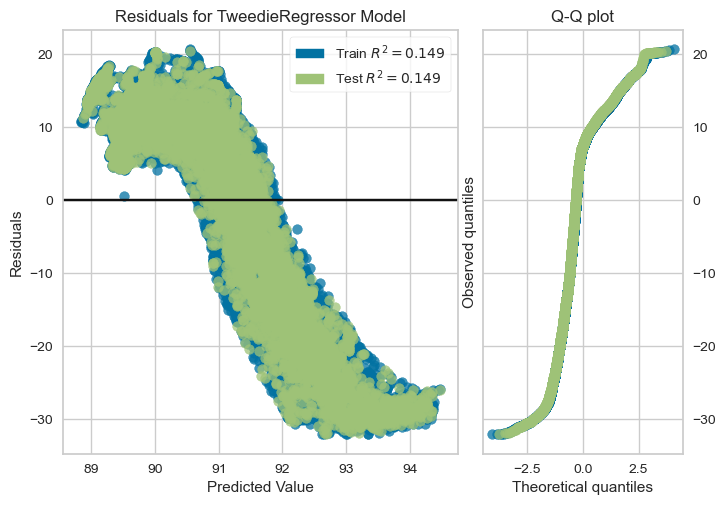

GradientBoostingRegressor - TRAIN = R^2: 0.9833475360124811, RMSE: 2.008110040292081
 TEST = R^2: 0.9830973798831987, RMSE: 2.022508954366177


c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



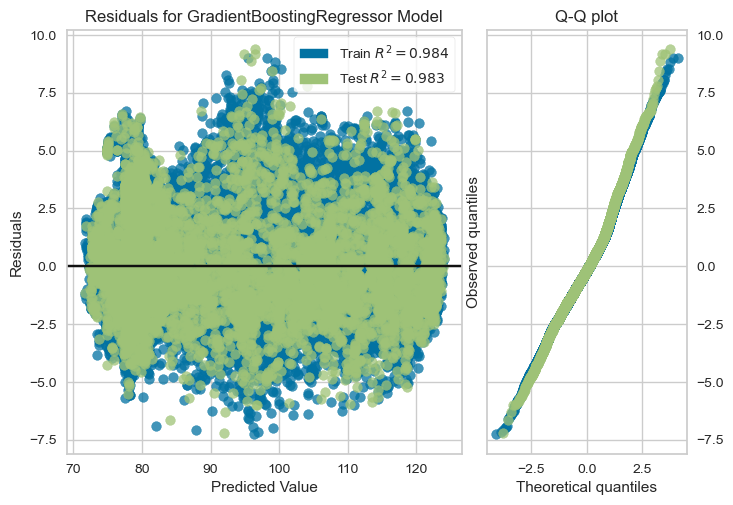

In [18]:
metricas_modelos = {}

for nombre_modelo, modelo in modelos:
    metricas_modelos[nombre_modelo] = fun.evaluar_modelo(modelo, nombre_modelo, compresor, X_train, y_train, X_test, y_test)

## OPTIMIZACIÓN DE HIPERPARÁMETROS

In [67]:
space = {
    'n_estimators': hp.randint('n_estimators', 50, 300),
    'max_features': hp.choice('max_features', [None, 'sqrt', 'log2']),
    'max_depth': hp.randint('max_depth', 1, 20),
    'min_samples_split': hp.randint('min_samples_split', 2, 100),  # Genera enteros entre 2 e infinito
    'min_samples_leaf': hp.randint('min_samples_leaf', 1, 100)  # Genera enteros entre 1 e infinito
}


# Definir la función objetivo
def objective(space):
    model = RandomForestRegressor(
        n_estimators=space['n_estimators'],
        min_samples_split=space['min_samples_split'],
        max_depth=space['max_depth'],
        min_samples_leaf=space['min_samples_leaf'],
        max_features=space['max_features'], 
        random_state=42,
        n_jobs=10
    )
    r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    return -r2

# Ejecutar la optimización de hiperparámetros
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=200, trials=trials)

# Imprimir los mejores hiperparámetros encontrados
print("Best Hyperparameters:", best)

  0%|          | 0/200 [00:03<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

100%|██████████| 50/50 [06:34<00:00,  7.90s/trial, best loss: -0.9957095822630231]
Best Hyperparameters: {'max_depth': 3, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 0, 'n_estimators': 5}

100%|██████████| 50/50 [09:27<00:00, 11.35s/trial, best loss: -0.9951415854091948]
Best Hyperparameters: {'max_depth': 0, 'max_features': 0, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 5}

00%|██████████| 200/200 [35:18<00:00, 10.59s/trial, best loss: -0.9953834440464039]
Best Hyperparameters: {'max_depth': 18, 'max_features': 0, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 133}

## Modelo con hiperparámetros optimizados

In [30]:
# Definir los modelos
modelos = [RandomForestRegressor(max_depth=0, max_features=0, min_samples_leaf=6, min_samples_split=10, n_estimators=5)]


# Realizar la validación cruzada y calcular la media de las puntuaciones para cada modelo
for modelo in modelos:
    nombre_modelo = f'{type(modelo).__name__}_optimizado'
    
    # Calcular R^2
    r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
    r2_score_promedio = np.mean(r2_scores)
    
    # Calcular RMSE
    rmse_scores = cross_val_score(modelo, X, y, cv=5, scoring=make_scorer(mean_squared_error))
    rmse_score_promedio = np.sqrt(np.mean(rmse_scores))
    
    # Almacenar los resultados en el diccionario
    resultados_modelos[nombre_modelo] = {'R^2': r2_score_promedio, 'RMSE': rmse_score_promedio}
    
    # Entrenar el modelo con todos los datos
    modelo.fit(X, y)
    
    # Guardar el modelo con pickle en la carpeta 'Modelos'
    ruta_modelo = os.path.join('Modelos/Comp_b', f'{nombre_modelo}_modelo.pkl')
    with open(ruta_modelo, 'wb') as modelo_archivo:
        pickle.dump(modelo, modelo_archivo)

    print(f"{nombre_modelo} - R^2: {r2_score_promedio}, RMSE: {rmse_score_promedio}")

    # Agregar análisis de residuos
    visualizer = ResidualsPlot(modelo, hist=False, qqplot=True)
    visualizer.fit(X_train, y_train)  # Fit the data to the visualizer
    visualizer.score(X_test, y_test)
    visualizer.show()  # Finalize and render the figure

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\maria\.conda\envs\RETO07_NARANJA\lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of RandomForestRegressor must be an int in the range [1, inf) or None. Got 0 instead.
